In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.9.1
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.0
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
# 多输出
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
# 多输出
output2=keras.layers.Dense(1)(hidden2)
model=keras.models.Model(inputs=[input_wide,input_deep],
                         outputs=[output,output2])
model.compile(loss='mean_squared_error', optimizer='sgd')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]

In [6]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [7]:
# wide选的是前面5列，deep选的是后面6列
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]
print(x_train_scaled_wide[:5])
print(x_train_scaled_deep[:5])
x_train_scaled_wide = x_train_scaled_wide[:10000]
x_train_scaled_deep = x_train_scaled_deep[:10000]
y_train = y_train[:10000]

[[ 0.80154431  0.27216142 -0.11624393 -0.20231151 -0.54305157]
 [-0.29807281  0.35226166 -0.10920508 -0.25055521 -0.03406402]
 [-0.03058829 -0.92934213  0.25962148 -0.00601274 -0.50040912]
 [ 1.90638325  0.51246213  0.4475828  -0.27672178 -0.63105833]
 [ 3.88017387 -0.92934213  1.29029867 -0.17269133 -0.22550141]]
[[-0.11624393 -0.20231151 -0.54305157 -0.02103962 -0.58976206 -0.08241846]
 [-0.10920508 -0.25055521 -0.03406402 -0.006034    1.08055484 -1.06113817]
 [ 0.25962148 -0.00601274 -0.50040912 -0.03077987  1.59844639 -1.81515182]
 [ 0.4475828  -0.27672178 -0.63105833 -0.07081147 -0.7064043   0.74649722]
 [ 1.29029867 -0.17269133 -0.22550141  0.0514101  -0.84637499  0.88631432]]


In [8]:
history = model.fit([x_train_scaled_wide, x_train_scaled_deep],
                    [y_train,y_train],
                    validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], y_valid),
                    epochs=100, callbacks=callbacks,workers=-1)

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 1.8507 - dense_2_loss: 0.8061 - dense_3_loss: 1.0446 - val_loss: 1.2825 - val_dense_2_loss: 0.5627 - val_dense_3_loss: 0.7197
Epoch 2/100
313/313 [==============================] - 0s 1ms/step - loss: 1.1077 - dense_2_loss: 0.4685 - dense_3_loss: 0.6392 - val_loss: 1.0881 - val_dense_2_loss: 0.4690 - val_dense_3_loss: 0.6190
Epoch 3/100
313/313 [==============================] - 0s 1ms/step - loss: 1.0197 - dense_2_loss: 0.4371 - dense_3_loss: 0.5826 - val_loss: 1.0389 - val_dense_2_loss: 0.4554 - val_dense_3_loss: 0.5835
Epoch 4/100
313/313 [==============================] - 0s 1ms/step - loss: 0.9523 - dense_2_loss: 0.4142 - dense_3_loss: 0.5381 - val_loss: 1.0076 - val_dense_2_loss: 0.4376 - val_dense_3_loss: 0.5700
Epoch 5/100
313/313 [==============================] - 0s 1ms/step - loss: 0.9215 - dense_2_loss: 0.4011 - dense_3_loss: 0.5204 - val_loss: 0.9634 - val_dense_2_loss: 0.4333 - val_dense_3_loss: 0.

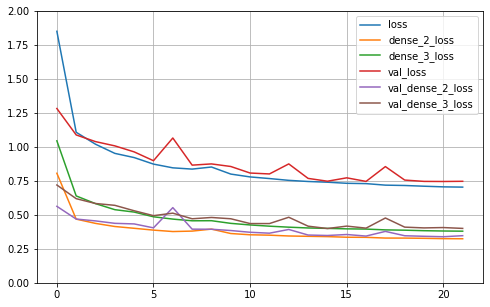

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()


plot_learning_curves(history)

In [10]:
print(model.evaluate([x_test_scaled_wide, x_test_scaled_deep], y_test, verbose=1))

162/162 [==============================] - 0s 997us/step - loss: 0.7342 - dense_2_loss: 0.3420 - dense_3_loss: 0.3922
[0.7342124581336975, 0.3420129120349884, 0.3921995759010315]
